Objective : 

1. Classification of protein sequences into amino acids

Task Performed

1. Data loading
2. Removing duplicate entries
3. Preparing train and test data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
from sys import path
from os import getcwd, listdir
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
RANDOM_STATE = 42

In [6]:
PROJECT_PATH = getcwd()[:getcwd().find("notebooks")][:-1]
path.append(f"{PROJECT_PATH}\\src")
DATA_PATH = f"{PROJECT_PATH}\\data"

In [7]:
listdir(DATA_PATH)

['pdb_data_no_dups.csv', 'pdb_data_seq.csv']

In [8]:
protein_seq_meta = pd.read_csv(f"{DATA_PATH}\\pdb_data_no_dups.csv")
protein_seq = pd.read_csv(f"{DATA_PATH}\\pdb_data_seq.csv")

In [9]:
protein_seq_meta.head()

structureId         classification experimentalTechnique macromoleculeType  \
0        100D         DNA-RNA HYBRID     X-RAY DIFFRACTION    DNA/RNA Hybrid   
1        101D                    DNA     X-RAY DIFFRACTION               DNA   
2        101M       OXYGEN TRANSPORT     X-RAY DIFFRACTION           Protein   
3        102D                    DNA     X-RAY DIFFRACTION               DNA   
4        102L  HYDROLASE(O-GLYCOSYL)     X-RAY DIFFRACTION           Protein   

   residueCount  resolution  structureMolecularWeight  \
0            20        1.90                   6360.30   
1            24        2.25                   7939.35   
2           154        2.07                  18112.80   
3            24        2.20                   7637.17   
4           165        1.74                  18926.61   

           crystallizationMethod  crystallizationTempK  densityMatthews  \
0  VAPOR DIFFUSION, HANGING DROP                   NaN             1.78   
1                            NaN                   NaN             2.00   
2                            NaN                   NaN             3.09   
3  VAPOR DIFFUSION, SITTING DROP                 277.0             2.28   
4                            NaN                   NaN             2.75   

   densityPercentSol                                        pdbxDetails  \
0              30.89             pH 7.00, VAPOR DIFFUSION, HANGING DROP   
1              38.45                                                NaN   
2              60.20  3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...   
3              46.06  pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...   
4              55.28                                                NaN   

   phValue  publicationYear  
0      7.0           1994.0  
1      NaN           1995.0  
2      9.0           1999.0  
3      7.0           1995.0  
4      NaN           1993.0

In [10]:
protein_seq.head()

structureId chainId                                           sequence  \
0        100D       A                                         CCGGCGCCGG   
1        100D       B                                         CCGGCGCCGG   
2        101D       A                                       CGCGAATTCGCG   
3        101D       B                                       CGCGAATTCGCG   
4        101M       A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...   

   residueCount macromoleculeType  
0            20    DNA/RNA Hybrid  
1            20    DNA/RNA Hybrid  
2            24               DNA  
3            24               DNA  
4           154           Protein

In [11]:
macromoleculeType = "Protein"

cols_to_keep = ["structureId", "classification"]
protein_seq_meta = protein_seq_meta[protein_seq_meta["macromoleculeType"] == macromoleculeType][cols_to_keep]
protein_seq_meta.drop_duplicates(inplace = True)
protein_seq_meta.set_index("structureId", inplace=True)

cols_to_keep = ["structureId", "sequence"]
protein_seq = protein_seq[protein_seq["macromoleculeType"] == macromoleculeType][cols_to_keep]
protein_seq.drop_duplicates(inplace = True)
protein_seq.set_index("structureId", inplace = True)

In [12]:
protein_seq_meta.head()

classification
structureId                       
101M              OXYGEN TRANSPORT
102L         HYDROLASE(O-GLYCOSYL)
102M              OXYGEN TRANSPORT
103L         HYDROLASE(O-GLYCOSYL)
103M              OXYGEN TRANSPORT

In [13]:
protein_seq.head()

sequence
structureId                                                   
101M         MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L         MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M         MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L         MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M         MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...

In [14]:
print(f"Found classification for {len(protein_seq_meta)} {macromoleculeType} in meta data.")
print(f"Unique Structure Ids for {len(protein_seq_meta.index.unique())} {macromoleculeType}")

print(f"Found classification for {len(protein_seq)} {macromoleculeType} in sequence data.")
print(f"Unique Structure Ids for {len(protein_seq.index.unique())} {macromoleculeType}")

Found classification for 127387 Protein in meta data.
Unique Structure Ids for 127387 Protein
Found classification for 166681 Protein in sequence data.
Unique Structure Ids for 127387 Protein


Different protein sequences can have same structure id because of different chain id

In [15]:
protein_seq = pd.merge(protein_seq, protein_seq_meta, on="structureId")
protein_seq.head()

sequence  \
structureId                                                      
101M         MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...   
102L         MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...   
102M         MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...   
103L         MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...   
103M         MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...   

                    classification  
structureId                         
101M              OXYGEN TRANSPORT  
102L         HYDROLASE(O-GLYCOSYL)  
102M              OXYGEN TRANSPORT  
103L         HYDROLASE(O-GLYCOSYL)  
103M              OXYGEN TRANSPORT

To get idea about distribution of protein structures 

In [16]:
classification_cnts = protein_seq["classification"].value_counts()
classification_cnts = classification_cnts.to_frame(name="count")
classification_cnts.index.rename(name="classification", inplace = True)
# classification_cnts["%count"] = classification_cnts.div(classification_cnts["count"].sum(axis=0) / 100)
classification_cnts.head()

count
classification                      
HYDROLASE                      24196
TRANSFERASE                    17025
OXIDOREDUCTASE                 14743
IMMUNE SYSTEM                   9002
HYDROLASE/HYDROLASE INHIBITOR   6389

In [17]:
classification_cnts.describe()

count
count   4468.000000
mean      37.305282
std      550.676291
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max    24196.000000

Text(0, 0.5, '%distribution')

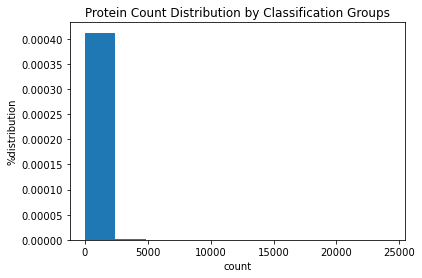

In [18]:
fig, ax = plt.subplots() 
n, bins, patches = ax.hist(data=classification_cnts,
                            x="count",
                            bins = 10,
                            density=True)
ax.set_title("Protein Count Distribution by Classification Groups")
ax.set_xlabel("count")
ax.set_ylabel("%distribution")

From above plots, we can say that protein count is not evenly distributed across all classification types

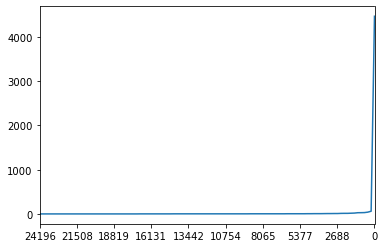

In [19]:
y, x = np.histogram(classification_cnts["count"], bins=100)
y, x = np.flip(y), np.flip(x)
y = np.cumsum(y)
y = np.append(y[0], y)
plt.plot(x, y)
plt.xlim((x[0], 0))
plt.xticks(np.flip(np.linspace(0, x[0], num=10)))
plt.show()

In [20]:
# Putting a threshold on protein count required within each class (help to increase sample size)
min_protein_count = 2000
protein_classes = classification_cnts[classification_cnts["count"] >= min_protein_count].index
print(f"Classification available for {len(protein_classes)} for minimum protein count of {min_protein_count}")
protein_classes

Classification available for 14 for minimum protein count of 2000


Index(['HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'IMMUNE SYSTEM',
       'HYDROLASE/HYDROLASE INHIBITOR', 'TRANSCRIPTION', 'LYASE',
       'TRANSPORT PROTEIN', 'SIGNALING PROTEIN', 'VIRAL PROTEIN', 'ISOMERASE',
       'PROTEIN BINDING', 'LIGASE', 'MEMBRANE PROTEIN'],
      dtype='object', name='classification')

In [21]:
# Filtering out protein sequences for selected classes
protein_seq = protein_seq[protein_seq["classification"].isin(protein_classes)]
protein_seq.reset_index(inplace = True)

In [22]:
protein_seq.head()

structureId                                           sequence  \
0        117E  TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...   
1        11AS  MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...   
2        11BA  KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...   
3        11BG  KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...   
4        11GS  MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...   

  classification  
0      HYDROLASE  
1         LIGASE  
2      HYDROLASE  
3      HYDROLASE  
4    TRANSFERASE

In [23]:
filtered_protein_seq = protein_seq.groupby("classification").apply(lambda x: x.sample(n=2000, random_state = RANDOM_STATE)).reset_index(drop = True)
train_fraction = .7
train = filtered_protein_seq.groupby("classification").apply(lambda x : x.sample(frac = train_fraction, random_state = RANDOM_STATE))
train.index = train.index.droplevel(level = 0)
test = filtered_protein_seq.drop(train.index)
print(f"Size of train data : {len(train)}")
print(f"Size of test data : {len(test)}")

Size of train data : 19600
Size of test data : 8400


In [24]:
train.head()

structureId                                           sequence  \
1860        1HO8  GSMGATKILMDSTHFNEIRSIIRSRSVAWDALARSEELSEIDASTA...   
353         1PW1  ADLPAPDDTGLQAVLHTALSQGAPGAMVRVDDNGTIHQLSEGVADR...   
1333        5A5B  MNGIQVDINRLKKGEVSLGTSIMAVTFKDGVILGADSRTTTGAYIA...   
905         5EDH  AAGLMQFTLPVRLCKEIELFHFDIGPFENMWPGIFVYMVHRSCGTS...   
1289        1G15  MLKQVEIFTDGSALGNPGPGGYGAILRYRGREKTFSAGYTRTTNNR...   

     classification  
1860      HYDROLASE  
353       HYDROLASE  
1333      HYDROLASE  
905       HYDROLASE  
1289      HYDROLASE

In [25]:
test.head()

structureId                                           sequence  \
1         2PSZ  MGSSHHHHHHSSGLVPRGSHMAKAPEQTVTEPVGSYARAERPQDFE...   
4         5A5O  SMQEEDTFRELRIFLRNVTHRLAIDKRFRVFTKPVDPDEVPDYVTV...   
8         2PNS  LPEQIDWRKKGAVTPVKNQGKCGSCWAFSTVSTVESINQIRTGNLI...   
11        2YZO  MVDVVMAPCSPVECRTAVVIDVLRATSTIVTALSNGASGVIPVKTI...   
13        2QE7  MQGMREIKRRIRSVKNTRQITKAMKMVAAAKLRRAQETAENARPYA...   

   classification  
1       HYDROLASE  
4       HYDROLASE  
8       HYDROLASE  
11      HYDROLASE  
13      HYDROLASE